In [1]:
# ws13

import numpy as np
import matplotlib.pyplot as plt

In [2]:

x = np.array([120,150,170,200,200,200,204,204,205,215,250,270,300,305])
y = np.array([1,1,1,1,1,0,0,1,1,0,0,0,0,0])

In [3]:
x[5:11] , y[5:11]

(array([200, 204, 204, 205, 215, 250]), array([0, 0, 1, 1, 0, 0]))

In [4]:
x.shape , y.shape

((14,), (14,))

In [5]:
for i, val in enumerate(y[0:11]):
    print(' {}  -> {}'.format(x[i], val))

 120  -> 1
 150  -> 1
 170  -> 1
 200  -> 1
 200  -> 1
 200  -> 0
 204  -> 0
 204  -> 1
 205  -> 1
 215  -> 0
 250  -> 0


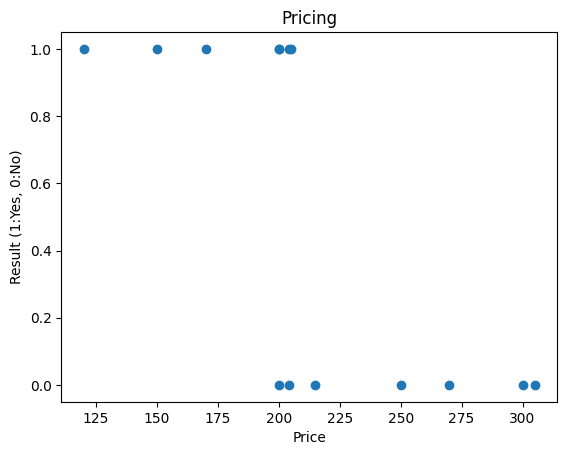

In [6]:
plt.scatter(x, y)
plt.title("Pricing")
plt.xlabel('Price')
plt.ylabel('Result (1:Yes, 0:No)')
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
model

LogisticRegression()

In [8]:
X = x.reshape(-1,1)
X[:5]

array([[120],
       [150],
       [170],
       [200],
       [200]])

In [9]:
model.fit(X, y)

LogisticRegression()

In [10]:
X_input = [[198],[200],[204],[205],[206],[207],[210]]

In [11]:
y_predict = model.predict(X_input)
y_predict

array([1, 1, 1, 1, 0, 0, 0])

In [12]:
print('Price | Pred')
print('--------------')
for i, val in enumerate(y_predict):
    print('{:5.1f} |   {}'.format(X_input[i][0], val))

Price | Pred
--------------
198.0 |   1
200.0 |   1
204.0 |   1
205.0 |   1
206.0 |   0
207.0 |   0
210.0 |   0


In [13]:
y_pred_prob = model.predict_proba(X_input)
y_pred_prob

array([[0.19416994, 0.80583006],
       [0.26164067, 0.73835933],
       [0.43386545, 0.56613455],
       [0.48169393, 0.51830607],
       [0.52986024, 0.47013976],
       [0.57747672, 0.42252328],
       [0.70908504, 0.29091496]])

In [14]:
print('Price | Pred | Prob(Y)')
print('--------------')
for i, val in enumerate(y_pred_prob):
    print('{:5.1f} | {:4} | {:.3f}'.format(X_input[i][0], y_predict[i], val[1]))

Price | Pred | Prob(Y)
--------------
198.0 |    1 | 0.806
200.0 |    1 | 0.738
204.0 |    1 | 0.566
205.0 |    1 | 0.518
206.0 |    0 | 0.470
207.0 |    0 | 0.423
210.0 |    0 | 0.291


In [18]:
prices = np.arange(160, 260, 1.0/1)
prob = []
for i in prices:
    p_loss, p_win = model.predict_proba([[i]])[0]
    prob.append(p_win)

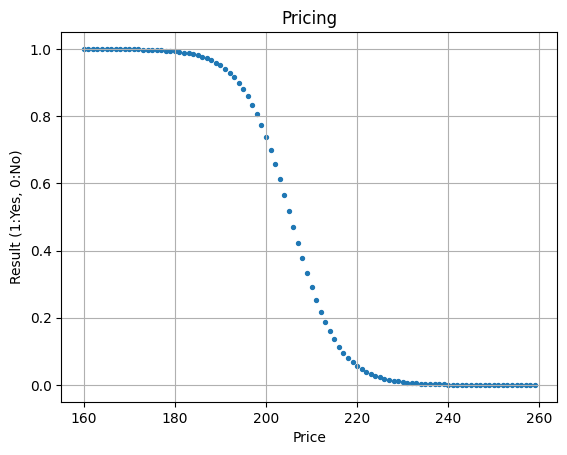

In [16]:
plt.scatter(prices, prob, s=8)
plt.title("Pricing")
plt.xlabel('Price')
plt.ylabel('Result (1:Yes, 0:No)')
plt.grid()
plt.show()